In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
analysing_data_drought = {'roi_id':[1,3,7,9,14,15,20,30,32],'NDVI_2016' : [0.670270574,-0.080382987,0.322618539,0.758542093,0.699984551,0.682241627,0.187858742,0.662919901,0.806486244],
                    'NDVI_2017' : [0.677615765,-0.010722916,0.332720109,0.756607205,0.664722991,0.720906781,0.677702708,0.654300477,0.118899529],
                    'NDVI_2018' : [0.829474085,-0.122107018,0.333797374,0.799064601,0.836002852,0.640408245,0.739419655,0.576625959,0.766069018]
                    }
try:
    analysing_data_drought2018 = pd.read_excel('QGIS_ID.xlsx') # download excel sheet from above mentioned link and update the location 
    print('file found in local directory')
except:
    print('file not found in local directory')
    print('Using default data')
    analysing_data_drought2018 = pd.DataFrame(analysing_data_drought)

file not found in local directory
Using default data


In [3]:
analysing_data_drought2018 = analysing_data_drought2018[['roi_id','NDVI_2016','NDVI_2017','NDVI_2018']]
analysing_data_drought2018.head()

roi_id  NDVI_2016  NDVI_2017  NDVI_2018
0       1   0.670271   0.677616   0.829474
1       3  -0.080383  -0.010723  -0.122107
2       7   0.322619   0.332720   0.333797
3       9   0.758542   0.756607   0.799065
4      14   0.699985   0.664723   0.836003

In [4]:
analysing_data_drought2018['AVGTEMP_2016_05_09'] = 9.52
analysing_data_drought2018['AVGTEMP_2017_05_17'] = 8.40
analysing_data_drought2018['AVGTEMP_2018_05_22'] = 9.27
analysing_data_drought2018['CUMPRECIPIT_2016_05_09'] = 636.40
analysing_data_drought2018['CUMPRECIPIT_2017_05_17'] = 781.68
analysing_data_drought2018['CUMPRECIPIT_2018_05_22'] = 724.01
analysing_data_drought2018

roi_id  NDVI_2016  NDVI_2017  NDVI_2018  AVGTEMP_2016_05_09  \
0       1   0.670271   0.677616   0.829474                9.52   
1       3  -0.080383  -0.010723  -0.122107                9.52   
2       7   0.322619   0.332720   0.333797                9.52   
3       9   0.758542   0.756607   0.799065                9.52   
4      14   0.699985   0.664723   0.836003                9.52   
5      15   0.682242   0.720907   0.640408                9.52   
6      20   0.187859   0.677703   0.739420                9.52   
7      30   0.662920   0.654300   0.576626                9.52   
8      32   0.806486   0.118900   0.766069                9.52   

   AVGTEMP_2017_05_17  AVGTEMP_2018_05_22  CUMPRECIPIT_2016_05_09  \
0                 8.4                9.27                   636.4   
1                 8.4                9.27                   636.4   
2                 8.4                9.27                   636.4   
3                 8.4                9.27                   636.4   
4                 8.4                9.27                   636.4   
5                 8.4                9.27                   636.4   
6                 8.4                9.27                   636.4   
7                 8.4                9.27                   636.4   
8                 8.4                9.27                   636.4   

   CUMPRECIPIT_2017_05_17  CUMPRECIPIT_2018_05_22  
0                  781.68                  724.01  
1                  781.68                  724.01  
2                  781.68                  724.01  
3                  781.68                  724.01  
4                  781.68                  724.01  
5                  781.68                  724.01  
6                  781.68                  724.01  
7                  781.68                  724.01  
8                  781.68                  724.01

In [5]:
def create_dataframe_for_corelation(row):
  data_dic = {}
  dates = ['2016_05_09','2017_05_17','2018_05_22']
  number_of_sensing_dates = 3
  position = 1
  while position <= number_of_sensing_dates:
    data_dic['roi_id'] = row['roi_id']
    data_dic['meanNDVI'] = row.iloc[position]
    data_dic['avgTemp'] = row.iloc[position + number_of_sensing_dates ]
    data_dic['cumPrecipt'] = row.iloc[position + 2 * number_of_sensing_dates ]
    data_dic['date'] = dates[position-1]
    data_list.append(data_dic)
    data_dic = {}
    position = position + 1
data_list = []
analysing_data_drought2018.apply(create_dataframe_for_corelation,axis =1)
df_correlation = pd.DataFrame(data_list)
df_correlation.head()


roi_id  meanNDVI  avgTemp  cumPrecipt        date
0     1.0  0.670271     9.52      636.40  2016_05_09
1     1.0  0.677616     8.40      781.68  2017_05_17
2     1.0  0.829474     9.27      724.01  2018_05_22
3     3.0 -0.080383     9.52      636.40  2016_05_09
4     3.0 -0.010723     8.40      781.68  2017_05_17

In [6]:
uniqueId = df_correlation['roi_id'].unique()

In [7]:
for id in uniqueId:
  print('corelation of the id',id)
  print(df_correlation[df_correlation['roi_id']==id][['meanNDVI','avgTemp','cumPrecipt']].corr(method ='pearson'))

corelation of the id 1.0
            meanNDVI   avgTemp  cumPrecipt
meanNDVI    1.000000  0.265254    0.158630
avgTemp     0.265254  1.000000   -0.909893
cumPrecipt  0.158630 -0.909893    1.000000
corelation of the id 3.0
            meanNDVI   avgTemp  cumPrecipt
meanNDVI    1.000000 -0.828681    0.521815
avgTemp    -0.828681  1.000000   -0.909893
cumPrecipt  0.521815 -0.909893    1.000000
corelation of the id 7.0
            meanNDVI   avgTemp  cumPrecipt
meanNDVI    1.000000 -0.605502    0.881092
avgTemp    -0.605502  1.000000   -0.909893
cumPrecipt  0.881092 -0.909893    1.000000
corelation of the id 9.0
            meanNDVI   avgTemp  cumPrecipt
meanNDVI    1.000000  0.342625    0.077982
avgTemp     0.342625  1.000000   -0.909893
cumPrecipt  0.077982 -0.909893    1.000000
corelation of the id 14.0
            meanNDVI   avgTemp  cumPrecipt
meanNDVI    1.000000  0.484276   -0.077686
avgTemp     0.484276  1.000000   -0.909893
cumPrecipt -0.077686 -0.909893    1.000000
corelation of 

<Figure size 720x720 with 0 Axes>

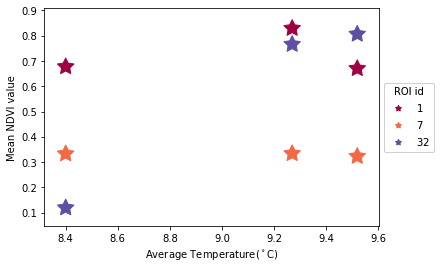

<Figure size 720x720 with 0 Axes>

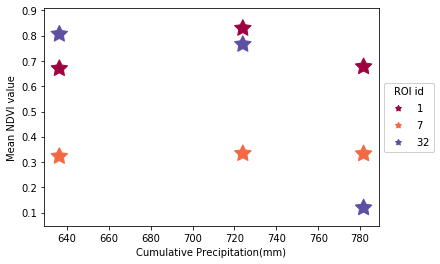

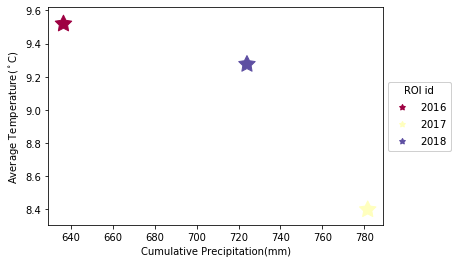

In [8]:
ROI_ids= [1,7,32]
try:
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots()
    scatter = ax.scatter(x =df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['avgTemp'],
                         y= df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['meanNDVI'] ,
                         c = df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['roi_id'] , s = 300, cmap="Spectral", marker=(5, 1))
    legend1 = ax.legend(*scatter.legend_elements(),loc='center left', bbox_to_anchor=(1, 0.5), title="ROI id")
    ax.add_artist(legend1)
    plt.xlabel('Average Temperature($^\circ$C)')
    plt.ylabel('Mean NDVI value')
except:
    plt.scatter(x =df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['avgTemp'],
                y= df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['meanNDVI'] ,
                c = df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['roi_id'] , s = 300, cmap="Spectral", marker=(5, 1))
    plt.xlabel('Average Temperature($^\circ$C)')
    plt.ylabel('Mean NDVI value')
try:
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots()
    scatter = ax.scatter(x =df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['cumPrecipt'],
                         y= df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['meanNDVI'] ,
                         c = df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['roi_id'] ,  s = 300, cmap="Spectral", marker=(5, 1))
    legend1 = ax.legend(*scatter.legend_elements(),loc='center left', bbox_to_anchor=(1, 0.5), title="ROI id")
    ax.add_artist(legend1)
    plt.xlabel('Cumulative Precipitation(mm)')
    plt.ylabel('Mean NDVI value')

except:
    plt.scatter(x =df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['cumPrecipt'],
                y= df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['meanNDVI'] ,
                c = df_correlation[df_correlation['roi_id'].isin(ROI_ids)]['roi_id'] ,  s = 300, cmap="Spectral", marker=(5, 1))
    plt.xlabel('Cumulative Precipitation(mm)')
    plt.ylabel('Mean NDVI value')
    
avgTemp = [9.518818306010923, 8.398287671232879, 9.275171232876712]
cumPrecipt = [636.4035991140644, 781.679069767442, 724.0139534883715]    
try:
    fig, ax = plt.subplots()
    scatter = ax.scatter(cumPrecipt,avgTemp, c = [2016,2017,2018], s = 300, cmap="Spectral", marker=(5, 1))
    plt.ylabel('Average Temperature($^\circ$C)')
    plt.xlabel('Cumulative Precipitation(mm)')
    legend1 = ax.legend(*scatter.legend_elements(),loc='center left', bbox_to_anchor=(1, 0.5), title="ROI id")
    ax.add_artist(legend1)
except:
    plt.scatter(cumPrecipt,avgTemp, c = [2016,2017,2018],s = 300, cmap="Spectral", marker=(5, 1))
    plt.ylabel('Average Temperature($^\circ$C)')
    plt.xlabel('Cumulative Precipitation(mm)')

In [9]:
#Loading data for total soil column 25cm
smi_precip_roi1 = pd.read_csv('D:/Rhine-waal Hsrw university/SS2020/mandotary subject/SummerGEO/csv file/smi_precip_roi1.csv')
smi_precip_roi7 = pd.read_csv('D:/Rhine-waal Hsrw university/SS2020/mandotary subject/SummerGEO/csv file/smi_precip_roi7.csv')
smi_precip_roi32 = pd.read_csv('D:/Rhine-waal Hsrw university/SS2020/mandotary subject/SummerGEO/csv file/smi_precip_roi32.csv')

In [10]:
smi_precip_roi1 .head(9)


cumprecip(mm)  smi_25cmRO1  smi_180cmROI1  Avgtemp(oC)
0         636.40     0.299045       0.048970         9.52
1         781.68     0.560763       0.171358         8.40
2         724.01     0.036719       0.093872         9.27

In [11]:
smi_precip_roi7 .head(9)


cumprecip(mm)  smi_25cm_ROI7  smi_180cm_ROI7  Avgtemp(oC)
0         636.40       0.234419        0.079842         9.52
1         781.68       0.646026        0.390124         8.40
2         724.01       0.026099        0.041552         9.27

In [12]:
smi_precip_roi32 .head(9)

cumprecip(mm)  smi_25cm_ROI32  smi_180cm_ROI32  Avgtemp(oC)
0         636.40        0.249807         0.188267         9.52
1         781.68        0.641417         0.469745         8.40
2         724.01        0.026099         0.054330         9.27

In [13]:
smi_precip_roi1.columns

Index(['cumprecip(mm)', 'smi_25cmRO1', 'smi_180cmROI1', 'Avgtemp(oC)'], dtype='object')

In [14]:
# smi_precip_roi1=smi_precip_roi1[['cumprecip', 'smi_25cm', 'Avgtemp']]

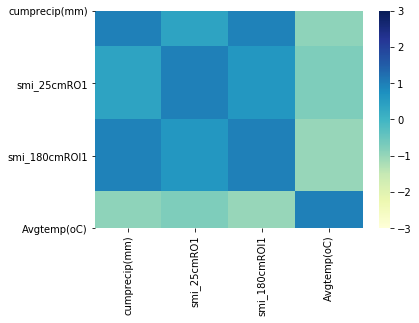

In [15]:
# Correlation is calculated in heatmap for sim180vsprecipt
Correlation_ro1= sns.heatmap(smi_precip_roi1.corr(method ='pearson'), vmin=-3,
            vmax=3,
            cmap='YlGnBu',
            )

In [16]:
smi_precip_roi1.corr(method ='pearson')

cumprecip(mm)  smi_25cmRO1  smi_180cmROI1  Avgtemp(oC)
cumprecip(mm)       1.000000     0.393562       0.963520    -0.909893
smi_25cmRO1         0.393562     1.000000       0.625242    -0.739464
smi_180cmROI1       0.963520     0.625242       1.000000    -0.987727
Avgtemp(oC)        -0.909893    -0.739464      -0.987727     1.000000

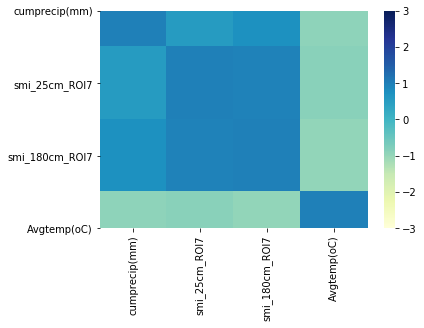

In [17]:
# Correlation is calculated in heatmap for sim180vsprecipt
Correlation_ro1= sns.heatmap(smi_precip_roi7.corr(method ='pearson'), vmin=-3,
            vmax=3,
            cmap='YlGnBu',
                            )

In [18]:
smi_precip_roi7.corr(method ='pearson')

cumprecip(mm)  smi_25cm_ROI7  smi_180cm_ROI7  Avgtemp(oC)
cumprecip(mm)        1.000000       0.558256        0.736884    -0.909893
smi_25cm_ROI7        0.558256       1.000000        0.972242    -0.852136
smi_180cm_ROI7       0.736884       0.972242        1.000000    -0.950928
Avgtemp(oC)         -0.909893      -0.852136       -0.950928     1.000000

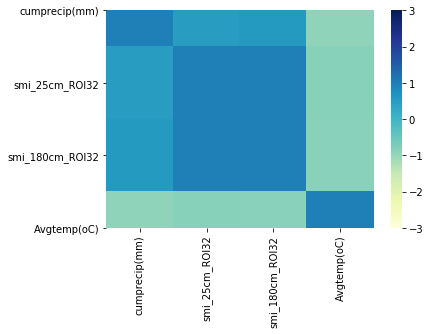

In [19]:
# Correlation is calculated in heatmap for sim180vsprecipt
Correlation_ro1= sns.heatmap(smi_precip_roi32.corr(method ='pearson'), vmin=-3,
            vmax=3,
            cmap='YlGnBu',
           )

In [20]:
smi_precip_roi32.corr(method ='pearson')

cumprecip(mm)  smi_25cm_ROI32  smi_180cm_ROI32  Avgtemp(oC)
cumprecip(mm)         1.000000        0.532397         0.570753    -0.909893
smi_25cm_ROI32        0.532397        1.000000         0.998943    -0.835587
smi_180cm_ROI32       0.570753        0.998943         1.000000    -0.859961
Avgtemp(oC)          -0.909893       -0.835587        -0.859961     1.000000